In [1]:
import sys
sys.path.append("..")
import os, pickle, scipy
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# from pydmd import DMD
# from tqdm import tqdm_notebook as tqdm
# from matplotlib import animation
# from IPython.display import HTML
# from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.decomposition import PCA
# from sklearn.utils.extmath import fast_logdet, randomized_svd, svd_flip
from scipy import linalg
import seaborn

from coh_tools import *
%matplotlib inline

In [2]:
os.chdir("../pickled")
os.listdir()

['base_data.pkl',
 'base_data_notdelta_allbands.pkl',
 'stim_data.pkl',
 'stim_data_notdelta_allbands.pkl']

In [3]:
##
test_experiment = 'MonkeyG_20150911_Session3_gamma'

In [20]:
base_data = pickle.load(open('base_data_notdelta_allbands.pkl', "rb"))
stim_data = pickle.load(open('stim_data_notdelta_allbands.pkl', "rb"))

In [23]:
base_data.keys()

dict_keys(['MonkeyG_20150911_Session3_delta', 'MonkeyG_20150911_Session3_theta', 'MonkeyG_20150911_Session3_alpha', 'MonkeyG_20150911_Session3_beta', 'MonkeyG_20150911_Session3_gamma', 'MonkeyG_20150911_Session3_high_gamma', 'MonkeyG_20150911_Session4_delta', 'MonkeyG_20150911_Session4_theta', 'MonkeyG_20150911_Session4_alpha', 'MonkeyG_20150911_Session4_beta', 'MonkeyG_20150911_Session4_gamma', 'MonkeyG_20150911_Session4_high_gamma', 'MonkeyJ_20160425_Session1_delta', 'MonkeyJ_20160425_Session1_theta', 'MonkeyJ_20160425_Session1_alpha', 'MonkeyJ_20160425_Session1_beta', 'MonkeyJ_20160425_Session1_gamma', 'MonkeyJ_20160425_Session1_high_gamma', 'MonkeyJ_20160425_Session2_delta', 'MonkeyJ_20160425_Session2_theta', 'MonkeyJ_20160425_Session2_alpha', 'MonkeyJ_20160425_Session2_beta', 'MonkeyJ_20160425_Session2_gamma', 'MonkeyJ_20160425_Session2_high_gamma', 'MonkeyJ_20160425_Session3_delta', 'MonkeyJ_20160425_Session3_theta', 'MonkeyJ_20160425_Session3_alpha', 'MonkeyJ_20160425_Session3_b

In [5]:
pc1_rec_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                   "base4":[], "stim4":[], "base5":[]}
pc2_rec_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                   "base4":[], "stim4":[], "base5":[]}
pc3_rec_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                   "base4":[], "stim4":[], "base5":[]}
pc_self_expl_vars = {"base0":[], "stim0":[], "base1":[], "stim1":[], "base2":[], "stim2":[], "base3":[], "stim3":[],
                   "base4":[], "stim4":[], "base5":[]}

for experiment_key in base_data.keys():
    if experiment_key.endswith("gamma"):
        base_experiment = base_data[experiment_key]
        stim_experiment = stim_data[experiment_key]
        
        pca = PCA(n_components = 6)
        pca.fit(base_experiment[0])
        
        pc1_rec_expl_vars["base0"].append(pca.explained_variance_ratio_[0])
        pc2_rec_expl_vars["base0"].append(pca.explained_variance_ratio_[1])
        pc3_rec_expl_vars["base0"].append(pca.explained_variance_ratio_[2])
        pc_self_expl_vars["base0"].append(pca.explained_variance_ratio_[0])
        
        for i in range(5):
            pca_self_stim = PCA(n_components = 1)
            pca_self_stim.fit(stim_experiment[i])
            pc_self_expl_vars["stim"+str(i)].append(pca_self_stim.explained_variance_ratio_[0])
            
            pc1_rec_expl_vars["stim"+str(i)].append(np.var(np.dot(stim_experiment[i],pca.components_[0])) / np.var(stim_experiment[i], axis=0).sum())
            pc2_rec_expl_vars["stim"+str(i)].append(np.var(np.dot(stim_experiment[i],pca.components_[1])) / np.var(stim_experiment[i], axis=0).sum())
            pc3_rec_expl_vars["stim"+str(i)].append(np.var(np.dot(stim_experiment[i],pca.components_[2])) / np.var(stim_experiment[i], axis=0).sum())
            
            pca_self_base = PCA(n_components = 1)
            pca_self_base.fit(base_experiment[i+1])
            pc_self_expl_vars["base"+str(i+1)].append(pca_self_base.explained_variance_ratio_[0])
            
            pc1_rec_expl_vars["base"+str(i+1)].append(np.var(np.dot(base_experiment[i+1],pca.components_[0])) / np.var(base_experiment[i+1], axis=0).sum())
            pc2_rec_expl_vars["base"+str(i+1)].append(np.var(np.dot(base_experiment[i+1],pca.components_[1])) / np.var(base_experiment[i+1], axis=0).sum())
            pc3_rec_expl_vars["base"+str(i+1)].append(np.var(np.dot(base_experiment[i+1],pca.components_[2])) / np.var(base_experiment[i+1], axis=0).sum())

In [8]:
pc1_rec_expl_vars.keys()

dict_keys(['base0', 'stim0', 'base1', 'stim1', 'base2', 'stim2', 'base3', 'stim3', 'base4', 'stim4', 'base5'])

In [10]:
for item in pc1_rec_expl_vars.items():
    print(np.mean(item[1]))

0.48199062855836217
0.47390768415153056
0.4864301915879816
0.4752061714174609
0.4723172063176525
0.4836433798834229
0.47255941517624844
0.4710425827882132
0.45353967271354434
0.4635814219973003
0.4493665706009825


In [11]:
for item in pc_self_expl_vars.items():
    print(np.mean(item[1]))

0.48199062855836217
0.48394253913314705
0.49847728207817005
0.4888131753264893
0.485772854137455
0.4999997690897489
0.49260761440483347
0.48919684136564995
0.4721021044504267
0.4822423865231581
0.4745250668871172


In [12]:
self_expvar = []
for item in pc_self_expl_vars.items():
    self_expvar.append(np.mean(item[1]))
np.array(self_expvar)

array([0.48199063, 0.48394254, 0.49847728, 0.48881318, 0.48577285,
       0.49999977, 0.49260761, 0.48919684, 0.4721021 , 0.48224239,
       0.47452507])

In [14]:
pc1_expvar = []
for item in pc1_rec_expl_vars.items():
    pc1_expvar.append(np.mean(item[1]))
np.array(pc1_expvar)

array([0.48199063, 0.47390768, 0.48643019, 0.47520617, 0.47231721,
       0.48364338, 0.47255942, 0.47104258, 0.45353967, 0.46358142,
       0.44936657])

In [20]:
pc2_expvar = []
for item in pc2_rec_expl_vars.items():
    pc2_expvar.append(np.mean(item[1]))
pc2_expvar_cumsum = np.array(pc2_expvar) + np.array(pc1_expvar)

array([0.67369509, 0.67987304, 0.66489158, 0.67307587, 0.6532912 ,
       0.67456628, 0.63977279, 0.66290356, 0.62539346, 0.64423773,
       0.62586774])

In [21]:
pc3_expvar = []
for item in pc3_rec_expl_vars.items():
    pc3_expvar.append(np.mean(item[1]))
pc3_expvar_cumsum = np.array(pc3_expvar) + np.array(pc2_expvar_cumsum)

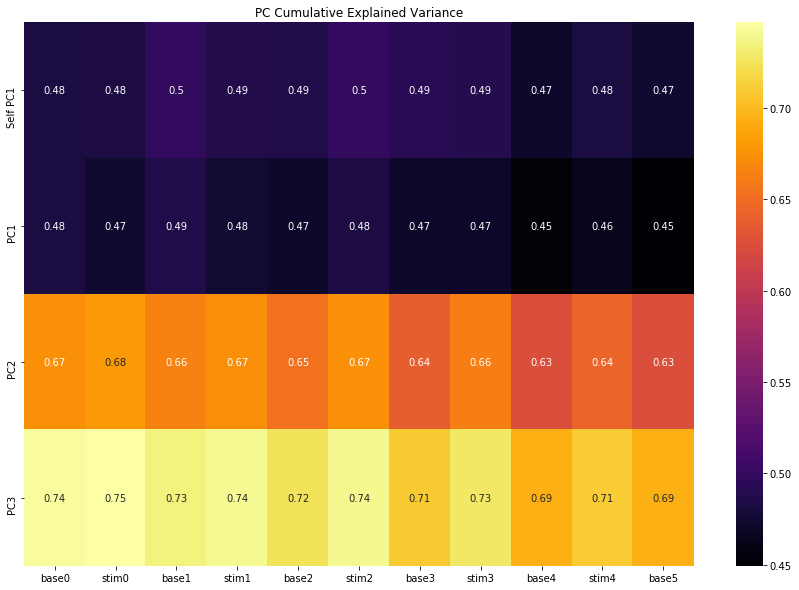

In [41]:
plt.subplots(figsize=(15,10))
plt.title("PC Cumulative Explained Variance")
seaborn.heatmap(np.vstack((self_expvar, pc1_expvar, pc2_expvar_cumsum, pc3_expvar_cumsum)), xticklabels=pc1_rec_expl_vars.keys(),
               yticklabels=["Self PC1", "PC1", "PC2", "PC3"], cmap="inferno", annot=True)